This notebook demonstrates some basic statistical principles - mean, median, mode, range, variance, and standard deviation.

In [11]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [17]:
# Generate some data ... 10000 samples chosen from a Gaussian distribution with a mean of 100 and a sigma of 10.
npts = 10000
mu = 55.74
sigma = 7.86

x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)

print (x)

[50.41792417 59.54420951 59.23941869 ... 53.76393428 61.68310844
 58.07106615]


(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   3.,   2.,   4.,   5.,   3.,   5.,   9.,  13.,  12.,
         11.,  15.,  24.,  21.,  37.,  39.,  41.,  46.,  62.,  50.,  73.,
         83., 110., 109., 102., 139., 164., 154., 162., 189., 198., 225.,
        253., 234., 242., 276., 285., 269., 283., 292., 282., 266., 276.,
        323., 296., 282., 272., 288., 251., 264., 251., 231., 207., 202.,
        197., 189., 185., 169., 153., 167., 131., 105., 107.,  92.,  88.,
         71.,  51.,  49.,  44.,  44.,  28.,  42.,  27.,  28.,  15.,  15.,
         14.,   8.,  12.,   8.,   6.,   3.,   5.,   3.,   4.,   1.,   0.,
          1.]),
 array([22.88374217, 23.4810022 , 24.07826223, 24.67552226, 25.27278229,
        25.87004231, 26.46730234, 27.06456237, 27.6618224 , 28.25908243,
        28.85634246, 29.45360249, 30.05086252, 30.64812255, 31.24538257,
        31.8426426 , 32.43990263, 33.03716266, 33.63442269, 34.23168272,
        34.82894275, 35.42

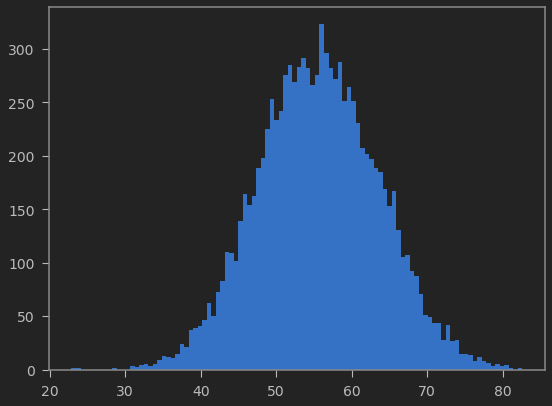

In [18]:
# Plot a histogram of the data
numbins = 100
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(x, bins=numbins)

# The information printed out is as follows:
#
# The first array is the number of entries in each bin.
# The second array gives the x-values of the EDGES of the bins, which are
# determined automatically by matplotlib.pyplot/numpy.  Thus, there are (numbins+1) values in this array.

In [19]:
# calculate the sample mean ... this is the mathematical average of the all of the data points.
# Note that this number is not exactly 100!  The reason is that the sample mean is an ESTIMATE
# of the true mean (100.0) which is based on the actual data.

xbar = np.mean(x)
print ("Sample mean = ",xbar)

print()
print ("I wonder how many of those decimal places are meaningful?")

Sample mean =  55.62281212500051

I wonder how many of those decimal places are meaningful?


In [5]:
# calculate the sample median ... this is the value of x that has as many points below as above.  For a symmetric
# distribution like the Gaussian, we would expect the mean and median to be the same number.
#
# Note that they are NOT the same number, precisely!  The median is thus another ESTIMATE of the true mean (100.0).

xmed = np.median(x)
print ("Sample median = ",xmed)

Sample median =  55.19506497842593


In [6]:
# calculate the sample mode ... The mode is the value of x that is the "most popular".  If we look at the plot
# plot above, that would correspond to the bin with the largest number of counts in it.  But, of course, that 
# is dependent on how we bin the data, right?  So, calculating the mode is a bit more complicated than calculating
# the mean or the median.  In other words, our estimate of the value of the mode depends on HOW WE BIN THE DATA!!!!
#
# For a symmetric distribution, like the Gaussian, the mode is yet another ESTIMATE of the true mean (100.0).
# For an asymmetric distribution, the sample mean, sample median, and sample mode can be quite different numbers!

# We start by creating a histogram ARRAY (which was actually done behind the scenes for creating the plot above)

xhist = np.histogram(x,numbins)
print(xhist[0],xhist[1])

# xhist[0] contains the number of entries in each bin
# xhist[1] contains the x-values of the EDGES of the bins.  This means that there are (numbins+1) elements in
# this array.
#
# Next, we find the index of the bin that has the maximum entries:

index = np.where(xhist[0] == np.amax(xhist[0]))
print (index[0])

# Finally, we find the mode by calculating the central value of the bin associated with the maximum entries.

xmode = (xhist[1][index[0]] + xhist[1][index[0]+1])/2.0

print ("Sample mode = ",xmode)


[1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 2 3 1 1 0 0 3 4 0 1 1 1 2 3 2 3 1 3 3 1
 2 0 3 2 3 2 3 2 1 1 6 2 2 1 0 1 1 2 2 0 1 1 2 0 1 1 0 0 2 0 1 1 0 2 1 0 0
 0 0 0 0 0 1 0 1 0 0 1 2 0 0 1 1 0 0 0 0 0 0 0 0 1 1] [40.10199689 40.46553072 40.82906455 41.19259839 41.55613222 41.91966606
 42.28319989 42.64673373 43.01026756 43.37380139 43.73733523 44.10086906
 44.4644029  44.82793673 45.19147057 45.5550044  45.91853824 46.28207207
 46.6456059  47.00913974 47.37267357 47.73620741 48.09974124 48.46327508
 48.82680891 49.19034274 49.55387658 49.91741041 50.28094425 50.64447808
 51.00801192 51.37154575 51.73507958 52.09861342 52.46214725 52.82568109
 53.18921492 53.55274876 53.91628259 54.27981642 54.64335026 55.00688409
 55.37041793 55.73395176 56.0974856  56.46101943 56.82455327 57.1880871
 57.55162093 57.91515477 58.2786886  58.64222244 59.00575627 59.36929011
 59.73282394 60.09635777 60.45989161 60.82342544 61.18695928 61.55049311
 61.91402695 62.27756078 62.64109461 63.00462845 63.36816228 63.731

In [7]:
# calculate the sample range ... this is the difference between the max and min values.

xrange = np.ptp(x)
print ("Sample range = ",xrange)

Sample range =  36.353383433606794


In [8]:
# calculate the sample variance and sample standard deviation
#
# NOTE:  the default variance and stdev methods in numpy calculate the BIASED versions!!! Yikes!!!! In general,
#        you should not use these!!!

variance = np.var(x)
stdev = np.std(x)

print ("Biased Sample Variance = ",variance)
print ("Biased Sample Standard Deviation = ",stdev)

# Calculate the UNBIASED variance and standard deviations.  

variance = np.var(x,ddof=1)
stdev = np.std(x,ddof=1)

print ("Unbiased Sample Variance = ",variance)
print ("Unbiased Sample Standard Deviation = ",stdev)

Biased Sample Variance =  58.478096087048996
Biased Sample Standard Deviation =  7.647097232744526
Unbiased Sample Variance =  59.06878392631212
Unbiased Sample Standard Deviation =  7.685621895872326


In [9]:
# calculate the biased (N), unbiased (N-1), and overly biased (N-2) variances by hand:

vsum = 0.0
for i in range(len(x)):
    vsum = vsum + (x[i]-xbar)**2
    
variance_b = vsum/npts
variance_ub = vsum/(npts-1)
variance_ob = vsum/(npts-2)

print ("Variances = ",variance_b,variance_ub,variance_ob)

print ("Std. Devs = ",np.sqrt(variance_b),np.sqrt(variance_ub),np.sqrt(variance_ob))

Variances =  58.47809608704898 59.0687839263121 59.671526619437735
Std. Devs =  7.6470972327445255 7.685621895872324 7.724734728095052


8.51349411643202 9.51837578519325 10.990873643658679


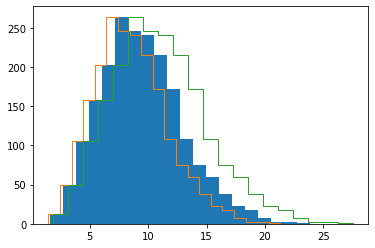

In [10]:
# write a loop to calculate the biased, unbiased, and overly biased variances/stdevs of a series of many samples,
# for comparision with one another

# create some lists to hold the sample standard deviations at each iteration of the loop
sb = []
sub = []
sob = []

# do the experiment 2000 times
for j in range(2000):
    # Sample a Gaussian with mean of 100.0 and a standard deviation of 10.0 ... 5 times.
    npts = 5
    mu = 100.0
    sigma = 10.0

    x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)
    
    # calculate the sample mean (5 samples)
    xbar = np.mean(x)

    # calculate the variance by hand
    vsum = 0.0
    for i in range(len(x)):
        vsum = vsum + (x[i]-xbar)**2
    
    # calculate the variance in three ways - biased (N), unbiased (N-1), and overly biased (N-2)
    variance_b = vsum/npts
    variance_ub = vsum/(npts-1)
    variance_ob = vsum/(npts-2)

    # calculate the standard deviation three ways
    sb.append(np.sqrt(variance_b))
    sub.append(np.sqrt(variance_ub))
    sob.append(np.sqrt(variance_ob))

# convert this lists to numpy arrays
sb = np.array(sb)
sub = np.array(sub)
sob = np.array(sob)

# plot histograms of the standard deviations for all 2000 experiments
# The unbiased version is plotted in solid blue, and the others are plotted as line plots for better visualization.
#
plt.hist(sub,bins=20)
plt.hist(sb,bins=20,histtype='step')
plt.hist(sob,bins=20,histtype='step')

# compare the means of the calculated standard deviations ... NOTE:  The UNBIASED method gives the best estimate!
print(np.mean(sb),np.mean(sub),np.mean(sob))